In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
from sqlalchemy import create_engine, Table, Column, Integer, String, MetaData, Integer, String, insert, select

engine = create_engine("sqlite+pysqlite:///GPSdata1.db", echo=False)

metadata_obj = MetaData()

players_table = Table("players", metadata_obj, autoload_with=engine)
sessions_data_table = Table("sessions_data", metadata_obj, autoload_with=engine)

In [27]:
# get play positions
positions = []

with engine.connect() as conn:

    pos_stm = (
        select(players_table.c.position)
        .group_by(players_table.c.position)
    )

    pos_stm_result = conn.execute(pos_stm)
    positions = pos_stm_result.scalars().all()

positions

['CB', 'CM', 'FB', 'FWD']

In [30]:
teams = []

with engine.connect() as conn:

    team_stm = (
        select(players_table.c.team)
        .group_by(players_table.c.team)
    )

    team_stm_result = conn.execute(team_stm)
    teams = team_stm_result.scalars().all()

teams

['1st', 'U17', 'U18', 'U23']

In [24]:
measure_columns = sessions_data_table.columns
measure_columns["HSR"]

Column('HSR', FLOAT(), table=<sessions_data>)

In [25]:
from SQLalch_helpers import selectPlayerIDsSubQ
from SQLalch_helpers import selectSessionsDataScatter

C:\Users\josep\AppData\Local\Temp\ipykernel_23720\1213476841.py:20: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  measures_all_pos_df = pd.DataFrame(measures_all_pos, index=positions).swapaxes("index", "columns")


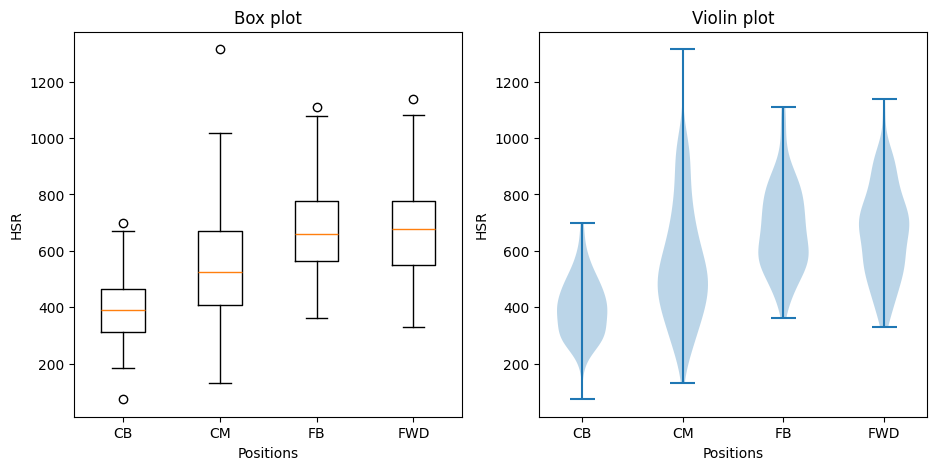

In [31]:
measure = "HSR"

measures_all_pos = []

for position in positions:
    player_subQ = selectPlayerIDsSubQ(position, players_table)

    with engine.connect() as conn:
        measure_slct_stm = (
            select(sessions_data_table.c.HSR)
            .where(sessions_data_table.c.player_id == player_subQ.c.id)
        )

        pos_measures = conn.execute(measure_slct_stm).scalars().all()
        pos_measures = np.asarray(pos_measures)
        measures_all_pos.append(pos_measures)

        

measures_all_pos_df = pd.DataFrame(measures_all_pos, index=positions).swapaxes("index", "columns")
# add series to allow subplots for team?

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))

axs[0].boxplot(measures_all_pos)
axs[0].set_title('Box plot')

axs[1].violinplot(measures_all_pos)
axs[1].set_title('Violin plot')

for ax in axs:
    
    ax.set_xticks([y + 1 for y in range(len(measures_all_pos))],
                  labels=positions)
    ax.set_xlabel('Positions')
    ax.set_ylabel(measure)

plt.show()
# measures_all_pos.boxplot(column=positions, grid=False)



<Axes: >

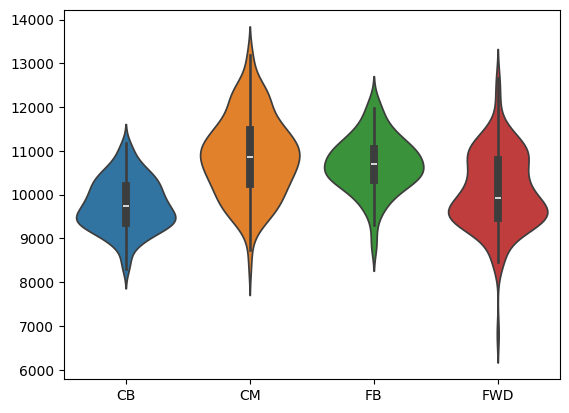

In [ ]:
import seaborn as sns
sns.violinplot(data=measures_all_pos_df)

In [32]:
measures_all_pos_df

,CB,CM,FB,FWD
0,282.8,546.9,674.9,418.7
1,465.3,577.2,725.4,352.1
2,249.9,735.2,581.5,493.9
3,385.1,935.8,567.9,393.8
4,440.9,882.8,693.8,331.7
...,...,...,...,...
180,NaN,256.9,NaN,NaN
181,NaN,243.8,NaN,NaN
182,NaN,275.0,NaN,NaN
183,NaN,525.3,NaN,NaN


In [15]:
df = pd.DataFrame(np.random.randn(10, 2),
                  columns=['Col1', 'Col2'])

print(np.random.randn(10, 2))

[[ 1.28258462  0.49324548]
 [ 1.16396941 -1.12470867]
 [ 0.89459328 -0.18899728]
 [ 0.75035956  1.49975571]
 [ 0.71865345  0.30787547]
 [ 1.5256736  -0.97459734]
 [ 1.74912206 -0.85933716]
 [-0.3622508  -0.28088452]
 [ 0.78936269  0.05258113]
 [-1.14952112 -1.57358186]]


In [ ]:
df

,Col1,Col2
0,1.167012,-0.466941
1,-0.675932,0.385834
2,-1.426492,0.222651
3,-0.899677,-0.148563
4,0.010482,-0.388003
5,-0.416892,0.159724
6,1.102418,0.868232
7,3.591001,-1.109230
8,0.856022,0.169804
9,0.041606,0.147932


{'whiskers': [<matplotlib.lines.Line2D at 0x249cfe89810>,
 'caps': [<matplotlib.lines.Line2D at 0x249cfe8ab10>,
 'boxes': [<matplotlib.lines.Line2D at 0x249cfe88f10>,
 'medians': [<matplotlib.lines.Line2D at 0x249cfe8bcd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x249cfe94550>,
 'means': []}

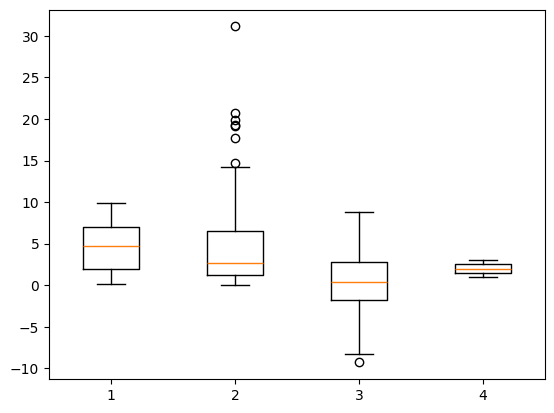

In [ ]:
x1 = 10*np.random.random(100)
x2 = 10*np.random.exponential(0.5, 100)
x3 = 10*np.random.normal(0, 0.4, 100)
x4 = np.asarray([1 ,2 ,3 ])
plt.boxplot ([x1, x2, x3, x4])

In [18]:
x1

array([9.89810279, 1.73173047, 1.60587529, 8.37966604, 3.71704479,
       2.40579243, 6.17041331, 5.26404614, 5.0266026 , 6.35357722,
       5.30520198, 1.00956056, 5.05876493, 4.97673305, 1.67837223,
       3.20285321, 1.80192121, 1.65690228, 5.64279519, 6.63712785,
       4.7231684 , 2.00314096, 2.34308945, 6.26100695, 9.21211096,
       7.27430946, 1.21293843, 4.41354287, 9.73064101, 6.48308031,
       6.72042853, 0.1266684 , 4.41725742, 7.50043959, 8.84177948,
       4.02350463, 6.19376711, 2.06869676, 3.55739901, 2.93344613,
       7.19838304, 5.72317757, 1.49601507, 2.79197251, 6.1879386 ,
       1.19741276, 9.25757953, 6.04894519, 1.9983974 , 0.88254479,
       0.72082159, 0.97765387, 9.55872681, 0.92222285, 5.90666729,
       9.89870424, 0.77152077, 7.21519204, 7.1147248 , 2.23818913,
       2.84476463, 3.2848159 , 1.5971734 , 3.18449367, 9.11098491,
       0.99004326, 8.33818274, 6.37813178, 0.32524493, 4.85243492,
       2.91653488, 5.01204851, 9.71042826, 1.47715047, 8.60773

In [19]:
measure_columns = sessions_data_table.columns
measure_columns